#     COURSE: Linear algebra: theory and implementation
##    SECTION: Eigendecomposition

#### Instructor: sincxpress.com
##### Course url: https://www.udemy.com/course/linear-algebra-theory-and-implementation/?couponCode=202110

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from mpl_toolkits.mplot3d import Axes3D


---
# VIDEO: Finding eigenvalues
---


[-1.31662479  5.31662479]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

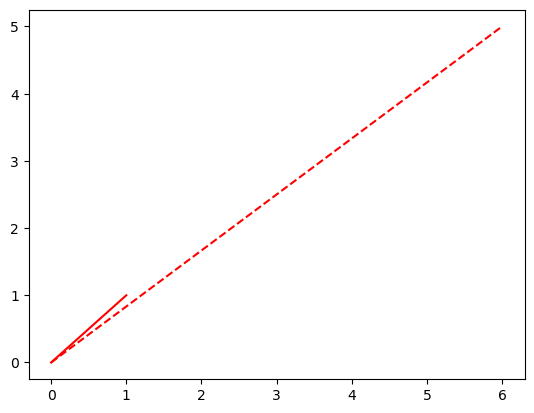

In [2]:
# matrix
A = [ [1,5], [2,3] ]

# extract the eigenvalues
eigvals = np.linalg.eig(A)

# note that the eigenvalues are in the first element of eigvals:
print(eigvals[0])


# specify two vectors
v1 = np.array([ 1,1 ])    # is an eigenvector!
v2 = np.random.randn(2,1) # unlikely to be an eigenvector
v2 = v2/np.linalg.norm(v2)# unit length for convenience

# compute Av
Av1 = A@v1
Av2 = A@v2


# plot the vectors and Av
plt.plot([0,v1[0]] ,[0,v1[1]],'r')
plt.plot([0,Av1[0]],[0,Av1[1]],'r--')
plt.plot([0,v2[0]] ,[0,v2[1]],'k')
plt.plot([0,Av2[0]],[0,Av2[1]],'k--')

plt.axis([-8,8,-8,8])
plt.show()


In [4]:
# confirm eigenvalues for a 3x3 matrix

# specify matrix
A = [ [-2,  2, -3 ],
      [-4,  1, -6 ],
      [-1, -2,  0 ]  ]

# get eigenvalues
evals = np.linalg.eig(A)
print(evals[0])


[-3. -1.  3.]



---
# VIDEO: Finding eigenvectors
---


In [2]:
# matrix
A = [ [1,2], [2,1] ]

# eigenvectors (compare with code above)
# note also the differences with MATLAB: different order, evals in vector
evals,evecs = np.linalg.eig(A)
print(evals), print(' ')
print(evecs)

[ 3. -1.]
 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


0.9999999999999999 0.9999999999999999


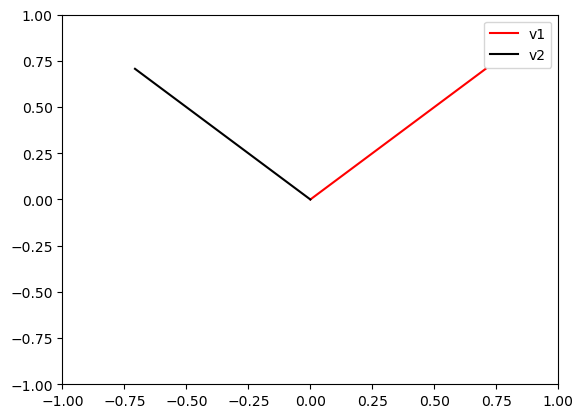

In [3]:
# compute the norm of each eigenvector
mag_v1 = np.sqrt( np.sum( np.square(evecs[:,0])) )
mag_v2 = np.sqrt( np.sum( np.square(evecs[:,1])) )
print(mag_v1,mag_v2)

# plot
plt.plot([0,evecs[0,0]],[0,evecs[1,0]],'r',label='v1')
plt.plot([0,evecs[0,1]],[0,evecs[1,1]],'k',label='v2')


plt.axis([-1,1,-1,1])
plt.legend()
plt.show()


---
# VIDEO: Diagonalization
---


<>:23: SyntaxWarning: invalid escape sequence '\L'
<>:23: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_7556/100246639.py:23: SyntaxWarning: invalid escape sequence '\L'
  plt.title('$V\Lambda V^{-1}$')


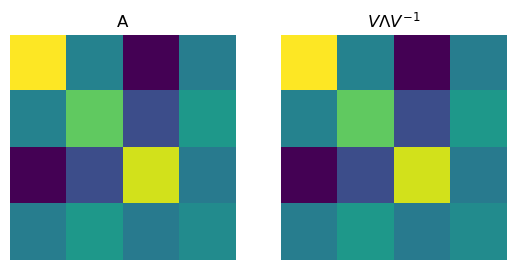

Reconstruction RMS: 1.9709132423138243e-13


In [4]:
## eigendecomposition of A

# make a symmetric matrix
A = np.round(10*np.random.randn(4,4))
A = A.T@A

# eigendecomposition
evals,evecs = np.linalg.eig(A)

# test reconstruction
Ap = evecs @ np.diag(evals) @ np.linalg.inv(evecs)


# plot
plt.subplot(121)
plt.imshow(A)
plt.axis('off')
plt.title('A')

plt.subplot(122)
plt.imshow(Ap)
plt.axis('off')
plt.title('$V\Lambda V^{-1}$')

plt.show()

# subtract the two (should be zero with rounding errors)
recondiff = A-Ap

# reconstruction error (note the numerical inaccuracies)
rmsA = np.sqrt( np.mean(np.square( np.reshape(recondiff,(1,-1)) )) )

print('Reconstruction RMS:', rmsA)


<>:23: SyntaxWarning: invalid escape sequence '\L'
<>:23: SyntaxWarning: invalid escape sequence '\L'
/tmp/ipykernel_7556/2542996095.py:23: SyntaxWarning: invalid escape sequence '\L'
  plt.title('$\Lambda$')


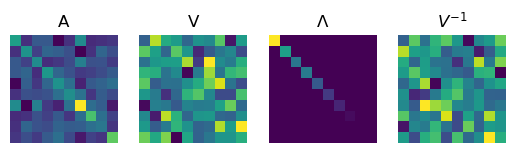

In [5]:
## diagonalization in images

# A matrix
A = np.random.randn(10,10)
A = A.T@A

# eigendecomposition
D,V = np.linalg.eig(A)

# show the results
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(V)
plt.title('V')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(D))
plt.title('$\Lambda$')
plt.axis('off')

plt.subplot(144)
plt.imshow(np.linalg.inv(V))
plt.title('$V^{-1}$')
plt.axis('off')

plt.show()


---
# VIDEO: Matrix powers via diagonalization
---


In [4]:
## matrix powers

A = np.random.rand(2,2)

# compute matrix power directly
print( np.linalg.matrix_power(A,3) ) # A@A@A
print(' ')

# and via eigendecomposition
D,V = np.linalg.eig(A)
D = np.diag(D)

# reproduce via diagonalization
print(V @ np.linalg.matrix_power(D,3) @ np.linalg.inv(V) )

[[0.27069024 0.17275238]
 [0.42130131 0.26857812]]
 
[[0.27069024 0.17275238]
 [0.42130131 0.26857812]]


[[-0.43323654 -0.84135407  0.32315544]
 [-0.56055105 -0.02923083 -0.82760382]
 [-0.70575394  0.53969333  0.45895804]]
 
[[ 0.43323654 -0.84135407 -0.32315544]
 [ 0.56055105 -0.02923083  0.82760382]
 [ 0.70575394  0.53969333 -0.45895804]]


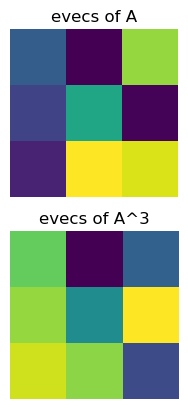

In [5]:
## eigenvalues of A and A^3

# create a symmetric matrix
A = np.random.rand(3,3)
A = A@A.T

D,V   = np.linalg.eig(A)
D3,V3 = np.linalg.eig( A@A@A )

print(V), print(' ')
print(V3)

plt.subplot(221)
plt.imshow(V)
plt.axis('off')
plt.title('evecs of A')

plt.subplot(223)
plt.imshow(V3)
plt.axis('off')
plt.title('evecs of A^3')

plt.show()

In [6]:
## plot the eigenvectors and eigenvalues

fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r')
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k')
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b')

# plot eigenvectors of A^3
ax.plot([0,V3[0,0]],[0,V3[1,0]],[0,V3[2,0]],'r--')
ax.plot([0,V3[0,1]],[0,V3[1,1]],[0,V3[2,1]],'k--')
ax.plot([0,V3[0,2]],[0,V3[1,2]],[0,V3[2,2]],'b--')

plt.show()

## show the eigenvalues
plt.plot([1,2,3],D,'bs-',label='A')
plt.plot([1.1,2.1,3.1],D3,'rs-',label='A^3')
plt.title('Eigenvalues')
plt.legend()
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [7]:
print(D), print(' ')
print(D3), print(' ')
print(D**3)

[4.41776924e+00 1.47052747e-03 8.02079515e-02]
 
[8.62202111e+01 3.17993747e-09 5.16003057e-04]
 
[8.62202111e+01 3.17994364e-09 5.16003057e-04]



---
# VIDEO: Eigenvectors of repeated eigenvalues
---


In [8]:
### Note about this cell: you need first to run the following cell,
#   then come back and run this one!

# a matrix
A = [ [ 5,  -1,  0], 
      [-1,   5,  0],
      [1/3,-1/3, 4] ]

# its eigendecomposition
D,V = np.linalg.eig(A)

# sort eigenvalues
i = np.argsort(D)
D = D[i]
V = V[:,i]


## plot eigenvectors
fig = plt.figure()
ax = fig.gca(projection='3d')

# plot eigenvectors of A
ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
plt.legend()

# plot subspace spanned by same-eigenvalued eigenvectors
plot_plane(ax, V[:,0],V[:,1],size=3)
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()


<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:24: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_5387/2408116600.py:23: SyntaxWarning: invalid escape sequence '\l'
  ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
/tmp/ipykernel_5387/2408116600.py:24: SyntaxWarning: invalid escape sequence '\l'
  ax.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],'k',label='v_2 ($\lambda$=%g)' %D[1])
/tmp/ipykernel_5387/2408116600.py:25: SyntaxWarning: invalid escape sequence '\l'
  ax.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],'b',label='v_3 ($\lambda$=%g)' %D[2])
/tmp/ipykernel_5387/2408116600.py:23: SyntaxWarning: invalid escape sequence '\l'
  ax.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],'r',label='v_1 ($\lambda$=%g)' %D[0])
/tmp/ipykernel_5387/2408116600.py:24: Synt

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [2]:
# this code is copy-pasted with some light editing from:
# https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib

from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
from mpl_toolkits.mplot3d import art3d

def plot_vector(fig, orig, v, color='blue'):
   ax = fig.gca(projection='3d')
   orig = np.array(orig); v=np.array(v)
   ax.quiver(orig[0], orig[1], orig[2], v[0], v[1], v[2],color=color)
   ax.set_xlim(0,10);ax.set_ylim(0,10);ax.set_zlim(0,10)
   ax = fig.gca(projection='3d')  
   return fig

def rotation_matrix(d):
    sin_angle = np.linalg.norm(d)
    if sin_angle == 0:return np.identity(3)
    d /= sin_angle
    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z, normal):
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised
    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    pathpatch._segment3d += delta

def plot_plane(ax, point, normal, size=10, color='g'):    
    p = Circle((0, 0), size, facecolor = color, alpha = .8)
    ax.add_patch(p)
    pathpatch_2d_to_3d(p, z=0, normal=normal)
    pathpatch_translate(p, (point[0], point[1], point[2]))


o = np.array([5,5,5])
v = np.array([3,3,3])
n = [0.5, 0.5, 0.5]

from mpl_toolkits.mplot3d import Axes3D


---
# Eigendecomposition of symmetric matrices
---


In [3]:
# create a random matrix
A = np.random.randn(14,14)

# make it symmetric (additive method)
A = A+A.T

# diagonalize it
evals,evecs = np.linalg.eig(A)
print(evecs)
# magnitudes of each vector
print( np.sqrt( sum(evecs**2) ) )

[[ 0.06657255 -0.37949802 -0.08741628 -0.43602281  0.37034058  0.30275372
   0.14068172  0.29697157  0.34844292 -0.08825027  0.3878604   0.05920811
   0.16759488 -0.07593768]
 [ 0.21616505 -0.09787119 -0.10683332 -0.49523394  0.06370128  0.01107608
  -0.21004313  0.16315792 -0.48326843  0.07260712 -0.27947046 -0.51062324
  -0.11941984 -0.14206914]
 [ 0.18726217 -0.00551006  0.37741833  0.31510305  0.28247896  0.42993084
   0.29488431 -0.17446205 -0.18262975  0.46396432  0.15073171 -0.24635578
  -0.07436879 -0.05984054]
 [ 0.39020559  0.55885603  0.0019459  -0.37438016 -0.189109    0.06560068
   0.08000707  0.00479401  0.20780984  0.38120778 -0.10229439  0.28889436
   0.18195255 -0.18229191]
 [-0.17001838 -0.234813    0.64837557 -0.10638037 -0.12974652  0.13448486
  -0.47619025 -0.05857805  0.30531247  0.05645467 -0.28671779 -0.01547209
   0.14617499 -0.13756316]
 [-0.25491761  0.46811867 -0.13057325  0.27104826  0.26466555  0.21448633
  -0.30573139  0.55897551  0.19742866  0.03983311 -

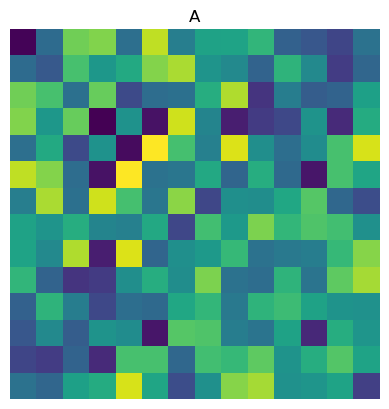

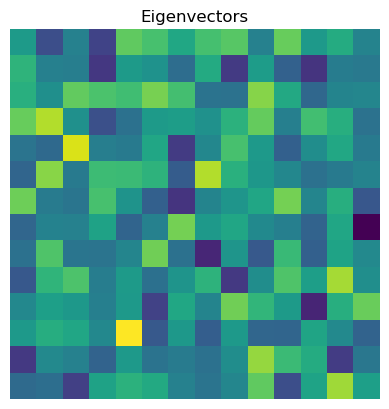

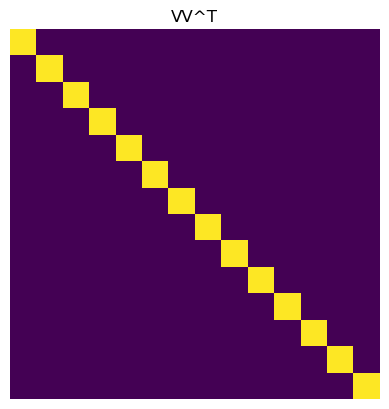

In [4]:
# and make plots
plt.imshow(A)
plt.axis('off')
plt.title('A')
plt.show()

plt.imshow(evecs)
plt.axis('off')
plt.title('Eigenvectors')
plt.show()

plt.imshow(evecs@evecs.T)
plt.axis('off')
plt.title('VV^T')
plt.show()


---
# VIDEO: Generalized eigendecomposition
---


In [ ]:
import scipy.linalg # kindof annoying, but numpy doesn't do GED

# define matrices
A = np.array([ [3,2], [1,3]])
B = np.array([ [1,1], [4,1]])

# GED
eigvals,eigvecs = scipy.linalg.eig(A,B)


# matrix-vector multiplication
Av = A@eigvecs[:,1]
Bv = B@eigvecs[:,1]
BinvAv = np.linalg.inv(B)@A@eigvecs[:,1]


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Av[0]],[0,Av[1]],'r--',linewidth=2,label='$Av_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Av')
plt.show()

plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,Bv[0]],[0,Bv[1]],'r--',linewidth=2,label='$Bv_2$')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('Bv')
plt.show()


plt.plot([0,eigvecs[0,1]],[0,eigvecs[1,1]],'k',linewidth=4,label='$v_2$')
plt.plot([0,BinvAv[0]],[0,BinvAv[1]],'r--',linewidth=2,label='B$^{-1}$Av_2')
plt.xlim([-3,3]), plt.ylim([-3,3])
plt.plot([-3,3],[0,0],'k:')
plt.plot([0,0],[-3,3],'k:')
plt.legend()
plt.title('B$^{-1}$Av')
plt.show()

